In [1]:
#import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

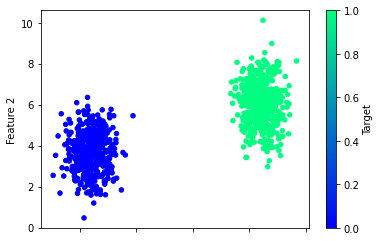

In [3]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7254 - accuracy: 0.3400
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.3893
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.4240
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4640
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4973
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5413
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5600
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5880
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6107
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6347
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.9960
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9973
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.9973
Epoch 89/100
24/24 [==============================] - 0s 954us/step - loss: 0.1110 - accuracy: 0.9973
Epoch 90/100
24/24 [==============================] - 0s 997us/step - loss: 0.1089 - accuracy: 0.9973
Epoch 91/100
24/24 [==============================] - 0s 997us/step - loss: 0.1068 - accuracy: 0.9973
Epoch 92/100
24/24 [==============================] - 0s 997us/step - loss: 0.1048 - accuracy:

<AxesSubplot:>

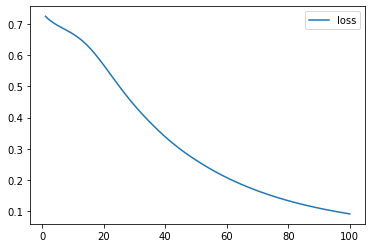

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

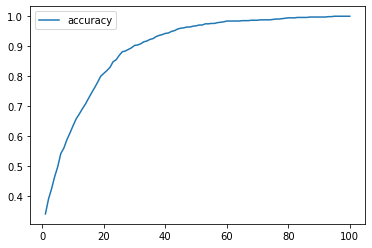

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0838 - accuracy: 1.0000
Loss: 0.08375456184148788, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

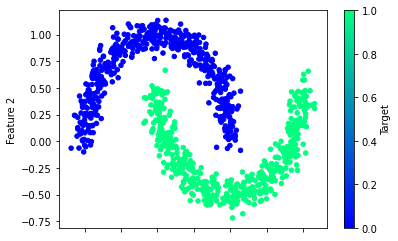

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2538 - accuracy: 0.3867
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.4227
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9610 - accuracy: 0.4467
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.4813
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.5013
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.5293
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.5493
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.5693
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.5867
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6013
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8880
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8880
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8880
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8893
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.8907
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

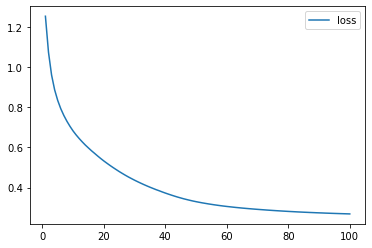

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

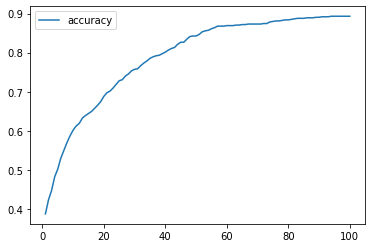

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.5520
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.6200
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7320
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.8173
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.8227
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5461 - accuracy: 0.8267
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.8333
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8373
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8480
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8507
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9080
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9080
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9093
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9080
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9093
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9093
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2290 - accuracy: 0.9093
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9093
Epoch 92/100
